# Lab 7-8
__CS 216, Everything Data, Spring 2020__
__Due Wednesday, April 1 by 4:40 pm US EAstern Time__ 

In this lab exercise, you will explore clustering for unsupervised machine learning. You may work in a group of 1-5 students of your choice; you will only need to submit once as a group (see submission instructions below). Remember that labs are graded for sincere effort; you should spend approximately 1 hour to 1 hour and 15 minutes (the length of a class session) working on the lab.

# Part 1: k-Means Clustering with Scikit-Learn
You have already used the scikit-learn library, the standard open source library for machine learning with Python. It also implements most mainstream methods for clustering and unsupervised learning: https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods. In this part, we will focus on understanding k-means clustering on a variety of synthetically generated examples. First we will need to import the necessary libraries. Note that we are importing matplotlib.pyplot as well so that we can visualize our clustering results (more on visualization coming up in lecture/hw/lab 9. 

In [1]:
# This line is just to make matplotlib play nicely with jupyter notebooks
%matplotlib inline 

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

To start off, we will generate some random data. np.random.normal draws samples from a normal (Gaussian) distribution, and allows us to do so in multiple dimensions at the same time. First we specify the dimension-wise means (the first tuple in the parameters), then the dimension-wise variance (the second tuple), then the resulting dimensions (where (100,2) means that we are drawing 100 samples, each with two dimensions; this will be represented as a 100 row by 2 column numpy array). 

In [2]:
np.random.seed(0) # ensures consistent results on multiple runs
cluster1 = np.random.normal((0,0), (1,1), (100,2))
cluster2 = np.random.normal((4,5), (1,1), (100,2))
cluster3 = np.random.normal((-4, 4), (1,1), (100,2))
cluster4 = np.random.normal((-1, 7), (1,1), (100,2))

What does this data look like? You can imagine two-dimensional normally distributed data as a "blob" where the mean gives the center of the blob (e.g., a mean of (0,0) means the blob is centered at (0,0) on the plane) and the variance gives the "stretch" of the blob in each dimension (so (1,1) means a fairly compact circular shape whereas (1,5) would imply an oval shape stretched in the second dimension). Because the data are normal and not uniform, samples we draw in this fashion will be exponentially more likely to appear near the mean. We can use matplotlib.pyplot to easily visualize this data. Below, we have plotted all of the clusters on the same plot, color coded by which cluster they belong to.

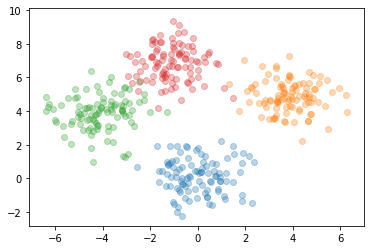

In [3]:
plt.scatter(cluster1[:,0], cluster1[:,1], alpha=0.3)
plt.scatter(cluster2[:,0], cluster2[:,1], alpha=0.3)
plt.scatter(cluster3[:,0], cluster3[:,1], alpha=0.3)
plt.scatter(cluster4[:,0], cluster4[:,1], alpha=0.3)
plt.show()

Great, these look like excellent clusters! But, of course, in clustering we aren't told what the "true" clusters are ahead of time. Instead, we just see the data without the labels of cluster identity, and want to try to infer a clustering. So what a clustering algorithm actually sees will look more like the following.

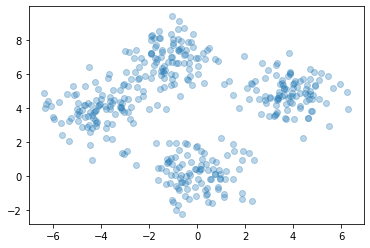

In [4]:
X = np.concatenate([cluster1, cluster2, cluster3, cluster4])
plt.scatter(X[:,0], X[:,1], alpha=0.3)
plt.show()

We can use k-means clustering to try to infer the correct clustering of the data. These clusters are a good fit for the k-means algorithm because they are of comparable size (100 samples each) and are compact (roughly spherical) in shape (we will see examples where these assumptions do not hold later). 

However, recall that k, the number of clusters we want to find, is a parameter we have to set in order to use the k-means clustering algorithm. Here, we know the true value of k is 4 because we generated the data, but for real data it is rarely clear what the "right" value of k is. One standard way to estimate k is to try clustering with multiple values of k. Below, we try all values of k between 2 and 9, and measure the residual sum of squares (RSS, a.k.a. the k-means objective) of the resulting clustering for each value of k.

In [5]:
scores = []
for k in range(2, 10):
    clustering = KMeans(n_clusters=k, random_state=0).fit(X)
    RSS = -clustering.score(X)
    scores += [RSS] 
    print('Using k of', k, 'the RSS is:', RSS)

Using k of 2 the RSS is: 3523.935928355892
Using k of 3 the RSS is: 1630.7817309232223
Using k of 4 the RSS is: 777.0489837408663
Using k of 5 the RSS is: 683.3617150380919
Using k of 6 the RSS is: 605.9202299887972
Using k of 7 the RSS is: 549.0325476802886
Using k of 8 the RSS is: 488.93256986381243
Using k of 9 the RSS is: 435.2092563662843


Recall that RSS is the sum of squared distances from data points to the means of the clusters to which they are assigned. The smaller the RSS, the more tightly clustered the data are. Of course, RSS *always* decreases as you increase k (you can always make more compact clusters if you are allowed to make more clusters), so the question is to find a good cutoff. Generally, we want to pick the smallest value of k such that the RSS drops significantly up to that point, but only decreases slowly and smoothly after that point. Sometimes that can be hard to infer just from looking at the numbers, so let's plot these RSS values as a function of k.

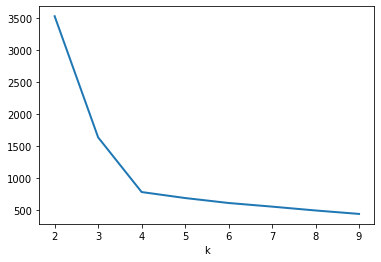

In [6]:
plt.plot(range(2,10), scores, linewidth=2)
plt.xlabel('k')
plt.show()

From the graph, it seems clear that the RSS drops significantly up to k=4, then very slowly and gradually thereafter. The "hinge" shape at k=4 is often referred to (informally) as an inflection point or a cusp. This is the value we want to choose for k (which is good, since we knew it was correct for this data we generated ourselves). Of course, choosing the value of k is often much more difficult in practice, especially if the data do not naturally cluster around any particular value.

Now that we have picked a value of k, we can perform k-means clustering with that value. The resulting clustering will assign a cluster label to every data point, which you can access with the `.labels_` attribute. Here, we use these labels to color the data points in order to visualize the clustering we compute.

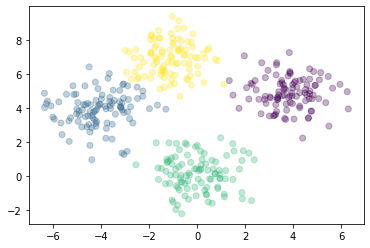

In [7]:
clustering = KMeans(n_clusters=4, random_state=0).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, alpha=0.3)
plt.show()

On this simple example, k-means clustering is able to almost perfectly reconstruct the original clusters. The plot is almost indistinguishable from the earlier one colored with the ground truth cluster identities. Recall though, this data is ideal for k-means clustering: the clusters are compact, well separated, and of comparable size. What happens if these assumptions are not true? Below, we generate new clusters that violate compactness: they are spread out in one dimension. The colors in the visualization are the true cluster identities. 

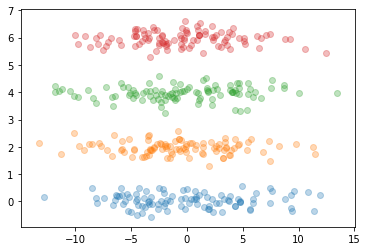

In [8]:
np.random.seed(0)
cluster1 = np.random.normal((0,0), (5,0.25), (100,2))
cluster2 = np.random.normal((0,2), (5,0.25), (100,2))
cluster3 = np.random.normal((0,4), (5,0.25), (100,2))
cluster4 = np.random.normal((0,6), (5,0.25), (100,2))
X_a = np.concatenate([cluster1, cluster2, cluster3, cluster4])

plt.scatter(cluster1[:,0], cluster1[:,1], alpha=0.3)
plt.scatter(cluster2[:,0], cluster2[:,1], alpha=0.3)
plt.scatter(cluster3[:,0], cluster3[:,1], alpha=0.3)
plt.scatter(cluster4[:,0], cluster4[:,1], alpha=0.3)
plt.show()

Let's assume that we know that k=4. What happens if we run k-means clustering on this data and plot the resulting clusters we generate?

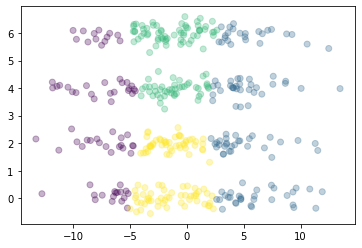

In [9]:
clustering = KMeans(n_clusters=4, random_state=0).fit(X_a)
plt.scatter(X_a[:, 0], X_a[:, 1], c=clustering.labels_, alpha=0.3)
plt.show()

As you can see, the results are less than ideal. Recall that k-means clustering is trying to minimize RSS, and RSS is minimized by compact (roughly spherical) clusters. You can see that clearly here, where the k-means algorithm combines the middle sections of the top two and bottom two clusters.

## Problem A
There are multiple ways to try to address this problem. One approach is to scale the data so that the dimensions are more comparable (note that here the y-dimension is much more "important" for determining the clusters than the x-dimension. Below, __edit the scaling factor for the x-coordinates so that running k-means clustering on the ransformed data recovers (approximately) the correct clusters.__ All you need to do is edit the scaling factor and run the two code blocks.

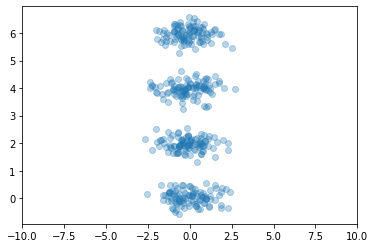

In [14]:
# X_transform will be the scaled version of our data
X_a_scaled = np.copy(X_a)

# FOR YOU TO DO: Edit the scaling factor
scaling_factor = .2
X_a_scaled[:,0] = X_a_scaled[:,0]*scaling_factor

# We plot the transformed data (on the same scale as before)
# so you can visualize the scaling.
plt.xlim(-10,10)
plt.scatter(X_a_scaled[:,0], X_a_scaled[:,1], alpha=0.3)
plt.show()

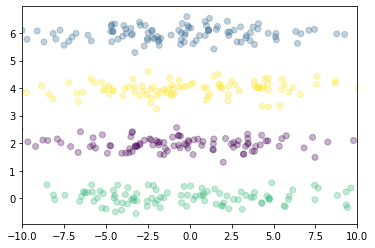

In [15]:
# For a given scaling factor, you can run this cell to compute
# the k-means clustering on the transformed data, and then plot
# those clusters on the original untransformed data.

clustering = KMeans(n_clusters=4, random_state=0).fit(X_a_scaled)

plt.scatter(X_a[:, 0], X_a[:, 1], c=clustering.labels_, alpha=0.3)
plt.xlim(-10,10)
plt.show()

## Problem B
Sometimes k-means clustering does not work well even when the clusters are compact. Here, we generate such an example. We first plot the true clusters (that is, we color the points according to their true cluster), and then we run k-means clustering (with the correct value of k=4) and plot the results. We then perform agglomerative (that is, hierarchical linkage-based) clustering using average linkage and plot the results.

On this example, agglomerative clustering with average linkage does much better than k-means clustering. __After you run the code, explain why.__ Also, if you want you can try changing the `linkage` parameter to AgglomerativeClustering to `single` or `complete` to see what would happen using a different linkage. 

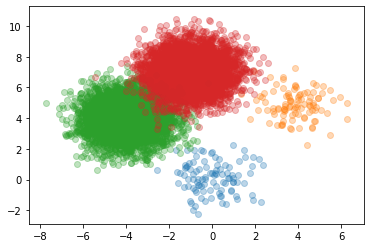

In [16]:
np.random.seed(0)
cluster1 = np.random.normal((0,0), (1,1), (100,2))
cluster2 = np.random.normal((4,5), (1,1), (100,2))
cluster3 = np.random.normal((-4, 4), (1,1), (5000,2))
cluster4 = np.random.normal((-1, 7), (1,1), (5000,2))
X_b = np.concatenate([cluster1, cluster2, cluster3, cluster4])

plt.scatter(cluster1[:,0], cluster1[:,1], alpha=0.3)
plt.scatter(cluster2[:,0], cluster2[:,1], alpha=0.3)
plt.scatter(cluster3[:,0], cluster3[:,1], alpha=0.3)
plt.scatter(cluster4[:,0], cluster4[:,1], alpha=0.3)
plt.show()

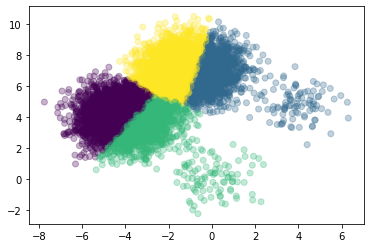

In [17]:
clustering = KMeans(n_clusters=4, random_state=0).fit(X_b)
plt.scatter(X_b[:, 0], X_b[:, 1], c=clustering.labels_, alpha=0.3)
plt.show()

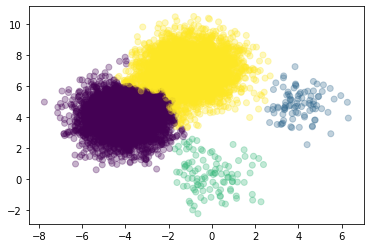

In [18]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=4, linkage='average').fit(X_b)
plt.scatter(X_b[:, 0], X_b[:, 1], c=clustering.labels_, alpha=0.3)
plt.show()

Agglomerative clustering does a better job ensuring that points that are close together are placed into the same cluster than k-means clustering.  This is because agglomerative clustering works by placing points that are close together into the same cluster and then placiing close together clusters into the same cluster.

# Part 2: Principle Component Analysis (PCA) and Dimension Reduction
So far, we have only looked at two-dimensional data (i.e., data with just two features) so that we can easily visualize our results. But in practice, we are typically interested in higher dimensional data (i.e., data sets with more than two features). 

Principle component analysis is a standard linear algebraic technique for reducing the dimensionality of data by representing the data as a linear combination of the features (for example, instead of keeping track of `col_1` and `col_2` separately, you might just keep track of `0.3*col_1 + 0.7*col_2`). The important thing about PCA is that it attempts to maintain as much of the variance in the data as possible using as few dimensions as possible. In other words, if many of your features are strongly correlated with one another, then PCA can generate a low-dimensional representation of the data that preserves many of the important differences. This makes it especially useful for clustering, where that variance represents the distances we want to use for clustering.

Let's start by generating some "high" dimensional data (we have just 4 features here, so not very many, but still too many to visualize easily). Note that the data really are broken up into 4 different clusters.

In [19]:
np.random.seed(0)
cluster1 = np.random.normal((0,3,0,3), (1,1,1,1), (100,4))
cluster2 = np.random.normal((3,0,3,0), (1,1,1,1), (100,4))
cluster3 = np.random.normal((0,0,0,0), (1,1,1,1), (100,4))
cluster4 = np.random.normal((3,3,3,3), (1,1,1,1), (100,4))
X_c = np.concatenate([cluster1, cluster2, cluster3, cluster4])

Now we will use the scikit-learn implementation of principle component analysis (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform) to generate a 2-dimensional representation of our data. PCA will attempt to find transformed "features" (or principle components) that explain as much of the variance in the data as possible. We print the percent of the variance explained by these two principle components, and plot the resulting transformed 2-dimensional data. As a side note, another application of PCA is to check for linearly correlated features in your dataset. If most of the variance in the data can be explained with substantially fewer principle components than the number of features in the original dataset, that is a strong indication that some of the features are linearly correlated.

Percent of variance explained by first principle component: 0.45514239241989213
Percent of variance explained by second principle component: 0.3991113528033466


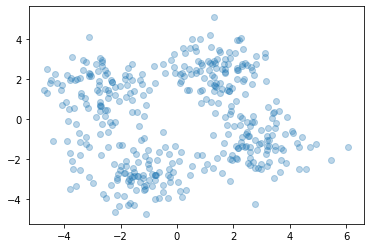

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_c_pca = pca.fit_transform(X_c)

print('Percent of variance explained by first principle component:', pca.explained_variance_ratio_[0])
print('Percent of variance explained by second principle component:', pca.explained_variance_ratio_[1])

plt.scatter(X_c_pca[:, 0], X_c_pca[:, 1], alpha=0.3)
plt.show()

## Problem C
You can see that PCA was able to explain about 85.5% of the variance in the data using just two dimensions (which are themselves linear combinations of the original features). Now, __perform k-means clustering (with k=4) and visualize the results using the dimension-reduced data `X_c_pca` colored according to the resulting clusters.__ You can follow the examples above to see how to do this. __Does the final result (the visualization on the dimension-reduced data) depend very much on whether you compute the clustering on the original data (`X_c`) or the dimension-reduced data (`X_c_pca`)? Why, or why not?__

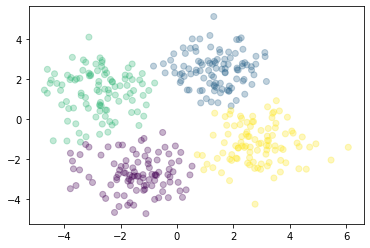

In [25]:
# Write your code for problem C here
clustering = KMeans(n_clusters=4, random_state=0).fit(X_c)
plt.scatter(X_c_pca[:, 0], X_c_pca[:, 1], c=clustering.labels_, alpha=0.3)
plt.show()

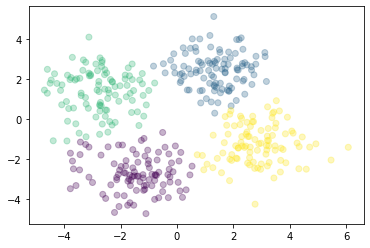

In [24]:
clustering = KMeans(n_clusters=4, random_state=0).fit(X_c_pca)
plt.scatter(X_c_pca[:, 0], X_c_pca[:, 1], c=clustering.labels_, alpha=0.3)
plt.show()

*Write your answer to problem C here. Recall the question: "Does the final result (the visualization on the dimension-reduced data) depend very much on whether you compute the clustering on the original data (`X_c`) or the dimension-reduced data (`X_c_pca`)? Why, or why not?"*

The final result for me did not change depending on whether I did clustering with the original data or the dimmension reduced data.  This is because pca reduces the dimmensions while still maintaining a lot of the variance of the data.

# Part 3: Clustering Real Data
So far we have been working with synthetic data we generated ourselves, where we know what the real clusters are. In practice, when we are working with real data, we rarely know what the "real" clusters are. Instead, we use clustering to try to explore and understand patterns in the data by grouping similar data points together. In this part of the lab, we will explore data the World Happiness Report (https://worldhappiness.report), which surveys individuals in countries around the world about their happiness. In addition, they use other information about things like GDP per capita, perceptions of corruption, etc. in order to try to understand these happiness scores.  

In [26]:
import pandas as pd

df_happy = pd.read_csv('world_happiness_report.csv')
df_happy.head()

,Country name,Happiness,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


## Problem D
__Try to cluster and interpret the above data.__ This part of the assignment is intentionally open-ended; you can use whatever clustering technique(s) you want, can transform or process the data however you wish, and can report whatever summary or visualization of your results you find significant. Most importantly, try to interpret your results. Do you think the clustering you computed reveals anything interesting or significant about the data? Are your results what you would expect, or are there any surprises?

In [42]:
# Write your code for problem D here.
#
# Feel free to add additional code blocks
# to keep your code organized.
#
# To get started, we pull the numerical 
# features into a numpy array X_happy.

X_happy = df_happy.iloc[:,1:].values

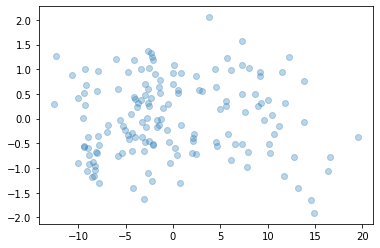

In [49]:
pca = PCA(n_components=2)
X_happy_pca = pca.fit_transform(X_happy)

plt.scatter(X_happy_pca[:, 0], X_happy_pca[:, 1], alpha=0.3)
plt.show()

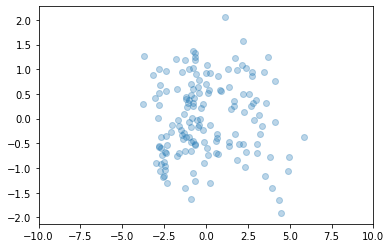

In [67]:
# X_transform will be the scaled version of our data
X_happy_scaled = np.copy(X_happy_pca)

# FOR YOU TO DO: Edit the scaling factor
scaling_factor = .3
X_happy_scaled[:,0] = X_happy_scaled[:,0]*scaling_factor

# We plot the transformed data (on the same scale as before)
# so you can visualize the scaling.
plt.xlim(-10,10)
plt.scatter(X_happy_scaled[:,0], X_happy_scaled[:,1], alpha=0.3)
plt.show()

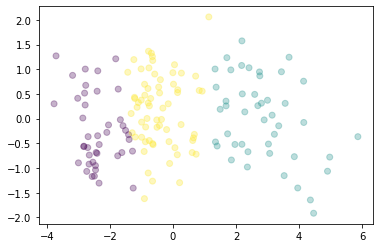

In [68]:
clustering = KMeans(n_clusters=3, random_state=0).fit(X_happy_scaled)
plt.scatter(X_happy_scaled[:, 0], X_happy_scaled[:, 1], c=clustering.labels_, alpha=0.3)
plt.show()

*Write your answer to problem D here. Recall the questions: Do you think the clustering you computed reveals anything interesting or significant about the data? Are your results what you would expect, or are there any surprises?*

I wasn't able to really find any significant patterns with clustering.  I principle component analysis to reduce dimmensions and tryed scaling it a little, but was not able to find anything significant with kmeans clustering.

## Submitting Lab 7-8
1. Double check that you have written all of your answers along with your supporting work in this notebook. Make sure you save the complete notebook.
1. Double check that your entire notebook runs correctly and generates the expected output. To do so, you can simply select Kernel -> Restart and Run All. 
2. You will download two versions of your notebook to submit, a .pdf and a .py. To create a PDF, we reccomend that you select File --> Download as --> HTML (.html). Open the downloaded .html file; it should open in your web broser. Double check that it looks like your notebook, then print a .pdf using your web browser (you should be able to select to print to a pdf on most major web browsers and operating systems). Check your .pdf for readability: If some long cells are being cut off, go back to your notebook and split them into multiple smaller cells. Also, make sure that it is a reasonable length; print statements which are truncated inside of the notebook may come to many pages in the pdf. To get the .py file from your notebook, simply select File -> Download as -> Python (.py).
3. Upload the .pdf to gradescope under lab 7-8 report and the .py to gradescope under lab 7-8 code. Only submit once per group, but be sure to add your partner using the [group feature on gradescope](https://www.gradescope.com/help#help-center-item-student-group-members).